作业四

某招聘网站部分职位信息，主要字段如下：

`[
'positionId', 'positionName', 'companyFullName', 'companyShortName',
'companySize', 'financeStage', 'industryField', 'companyLabelList',
'firstType', 'positionLables', 'industryLables', 'createTime', 'city',
'district', 'businessZones', 'salary', 'salaryMonth', 'workYear', 'jobNature', 'education', 'positionAdvantage']`


需求：在jupyter下对职位信息进行可视化分析；

1. 薪资相关

- 1）薪资分析

- 2）不同城市薪资分布

- 3）N薪分布

- 4）工作年限与薪资



2. 职位分析

- 1）不同城市职位数量

- 2）公司融资情况

- 3）不同行业公司数量

- 4）工作经验分析

- 5）职位标签：词云制作

In [1]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re

In [2]:
%matplotlib inline
#读取excel文件
fpath = r'data\homework4.csv'
f = open(fpath)
pdata = pd.read_csv(f)
pdata

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,2021/4/26 10:00,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice"
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,2021/4/28 5:18,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作"
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,2021/4/26 10:00,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,7928717,流程专员,腾讯科技（深圳）有限公司,腾讯,2000人以上,上市公司,"游戏,社交媒体,音频｜视频媒体","['免费班车', '成长空间', '年度旅游', '岗位晋升']",产品|需求|项目类,"['体系', '指标', '项目管理', '过程管理', '数据分析', '指标管理']",...,2021/3/30 9:52,重庆,渝北区,NaN,8k-14k,13,3-5年,全职,本科,互联网；职业发展
3176,8426839,高级产品经理,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],产品|需求|项目类,['产品策划'],...,2021/4/12 16:35,重庆,南岸区,NaN,10k-20k,0,5-10年,全职,本科,五险一金—带薪年假—周末双休、餐补
3177,8428647,高级数据架构师,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],开发|测试|运维类,['数据服务｜咨询'],...,2021/4/12 16:35,重庆,南岸区,NaN,15k-22k,0,1-3年,全职,本科,五险一金—带薪年假—周末双休、餐补
3178,3506705,软件工程师-实习生,重庆道微投资管理有限公司,重庆道微投资,15-50人,不需要融资,金融,"['专项奖金', '弹性工作', '节日礼物', '领导好']",开发|测试|运维类,"['科技金融', '金融业', '软件开发']",...,2021/4/20 10:48,重庆,渝北区,['大竹林'],3k-4k,0,不限,实习,本科,"弹性工作,节日福利,扁平化管理"


In [3]:
pdata.columns

Index(['positionId', 'positionName', 'companyFullName', 'companyShortName',
       'companySize', 'financeStage', 'industryField', 'companyLabelList',
       'firstType', 'positionLables', 'industryLables', 'createTime', 'city',
       'district', 'businessZones', 'salary', 'salaryMonth', 'workYear',
       'jobNature', 'education', 'positionAdvantage'],
      dtype='object')

# 1 薪资相关
## 1.1 薪资分析

In [4]:
# 查看薪资的构成
pdata["salary"].unique()

array(['15k-30k', '3k-6k', '25k-45k', '15k-25k', '2k-4k', '20k-40k',
       '18k-36k', '20k-30k', '15k-20k', '25k-40k', '25k-50k', '20k-35k',
       '13k-25k', '18k-35k', '13k-20k', '4k-8k', '25k-35k', '8k-13k',
       '10k-12k', '10k-20k', '15k-22k', '12k-24k', '10k-15k', '15k-28k',
       '35k-50k', '30k-60k', '20k-25k', '6k-8k', '10k-18k', '8k-15k',
       '6k-9k', '10k-13k', '3k-5k', '18k-30k', '9k-15k', '40k-80k',
       '18k-23k', '4k-5k', '12k-19k', '8k-10k', '2k-3k', '12k-20k',
       '30k-55k', '12k-18k', '6k-10k', '8k-16k', '30k-40k', '6k-12k',
       '7k-14k', '18k-28k', '18k-25k', '3k-4k', '16k-30k', '17k-30k',
       '28k-48k', '8k-12k', '30k-50k', '35k-60k', '40k-60k', '15k-27k',
       '7k-12k', '22k-27k', '25k-30k', '20k-28k', '12k-15k', '7k-8k',
       '9k-18k', '13k-18k', '13k-15k', '11k-20k', '35k-55k', '7k-10k',
       '17k-22k', '50k-80k', '9k-11k', '5k-9k', '13k-19k', '16k-20k',
       '14k-20k', '4k-6k', '15k-18k', '15k-26k', '18k-22k', '22k-37k',
       '10k-14k

由此可见，薪资构成段重复，需要去重，选择将薪资改为均值

In [5]:
def takeMean(s:str):
    group = re.match(r"(\d+)k-(\d+)k",s);
    if group == None:
        return np.nan;
    else:
        low,high = group.groups();
        return (int(low) + int(high))/2;

pdata["mean_salary"] = pdata["salary"].map(takeMean)
pdata["mean_salary"]

0       22.5
1        4.5
2       35.0
3       22.5
4       20.0
        ... 
3175    11.0
3176    15.0
3177    18.5
3178     3.5
3179     9.5
Name: mean_salary, Length: 3180, dtype: float64

In [6]:
#查找是否有缺省值
pdata["mean_salary"].isnull().sum()

1

In [7]:
#只有一个，选择去除缺省值
pdata = pdata.dropna(subset=["mean_salary"])
pdata

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage,mean_salary
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice",22.5
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作",4.5
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观,35.0
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队,22.5
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,7928717,流程专员,腾讯科技（深圳）有限公司,腾讯,2000人以上,上市公司,"游戏,社交媒体,音频｜视频媒体","['免费班车', '成长空间', '年度旅游', '岗位晋升']",产品|需求|项目类,"['体系', '指标', '项目管理', '过程管理', '数据分析', '指标管理']",...,重庆,渝北区,NaN,8k-14k,13,3-5年,全职,本科,互联网；职业发展,11.0
3176,8426839,高级产品经理,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],产品|需求|项目类,['产品策划'],...,重庆,南岸区,NaN,10k-20k,0,5-10年,全职,本科,五险一金—带薪年假—周末双休、餐补,15.0
3177,8428647,高级数据架构师,重庆康洲大数据有限公司,药智网,150-500人,未融资,数据服务｜咨询,[],开发|测试|运维类,['数据服务｜咨询'],...,重庆,南岸区,NaN,15k-22k,0,1-3年,全职,本科,五险一金—带薪年假—周末双休、餐补,18.5
3178,3506705,软件工程师-实习生,重庆道微投资管理有限公司,重庆道微投资,15-50人,不需要融资,金融,"['专项奖金', '弹性工作', '节日礼物', '领导好']",开发|测试|运维类,"['科技金融', '金融业', '软件开发']",...,重庆,渝北区,['大竹林'],3k-4k,0,不限,实习,本科,"弹性工作,节日福利,扁平化管理",3.5


In [8]:
pdata["mean_salary"].describe()

count    3179.000000
mean       17.350425
std        10.086140
min         1.500000
25%         9.500000
50%        15.000000
75%        22.500000
max        75.000000
Name: mean_salary, dtype: float64

Text(0, 0.5, '数量')

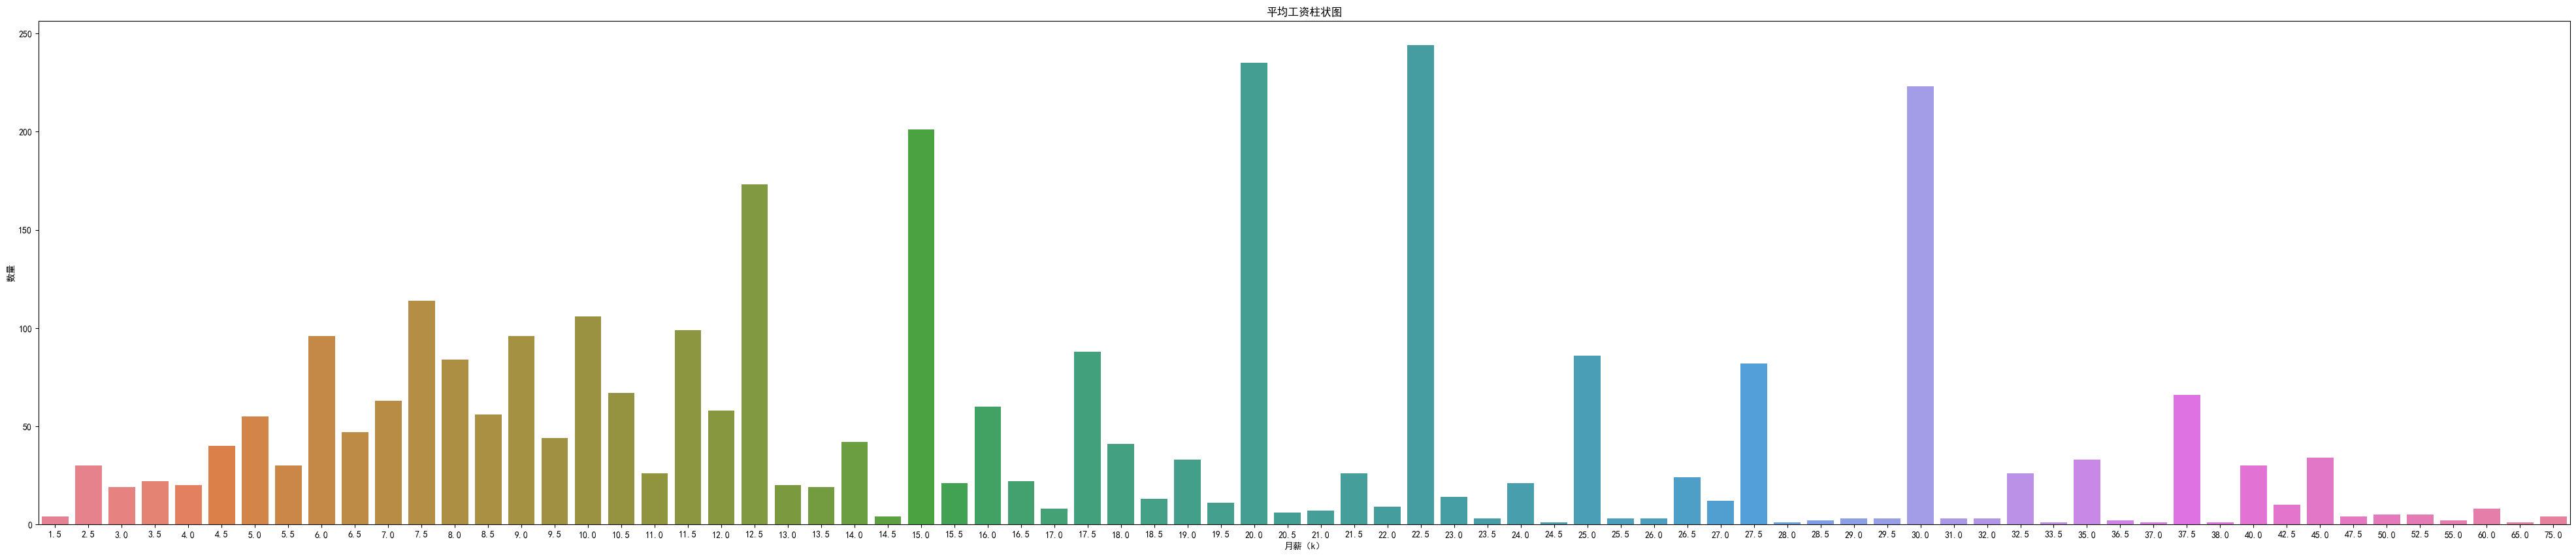

In [9]:
# 绘制柱状图

#设置画布大小
plt.figure(figsize = (50,10));
# 设置字体
plt.rcParams["font.family"] = "SimHei"
#设置标题
plt.title("平均工资柱状图")
#绘图
cls = sns.color_palette(palette='husl', n_colors=len(pdata["mean_salary"].unique()))
_ = sns.countplot(data = pdata, x = "mean_salary",hue="mean_salary",palette=cls,legend=False);
#坐标轴
plt.xlabel("月薪（k）")
plt.ylabel("数量")

In [10]:
# 计算工资均值，最大值，最小值，众数
pdata_mean = pdata["mean_salary"].mean()
pdata_max = pdata["mean_salary"].max()
pdata_min = pdata['mean_salary'].min()
pdata_imax = pdata['mean_salary'].value_counts().idxmax()

print(f"工资平均值为{pdata_mean:.2f}k")
print(f"工资最大值为{pdata_max:.2f}k")
print(f"工资最小值为{pdata_min:.2f}k")
print(f"工资众数为{pdata_imax:.2f}k")

工资平均值为17.35k
工资最大值为75.00k
工资最小值为1.50k
工资众数为22.50k


## 1.2 不同城市薪资分布

In [11]:
#查看所有城市
pdata["city"].unique()

array(['北京', '上海', '深圳', '南京', '武汉', '广州', '杭州', '成都', '重庆'], dtype=object)

In [12]:
#根据城市分组，获取城市平均薪资
salByCity = pdata.groupby("city")["mean_salary"].apply(lambda x: x.map(lambda y: int(y)).mean());
salByCity

city
上海    20.657143
北京    22.591111
南京    13.744286
广州    16.976190
成都    11.730769
杭州    20.442308
武汉    12.600000
深圳    20.841191
重庆    12.333333
Name: mean_salary, dtype: float64

In [13]:
salByCity = salByCity.reset_index()
salByCity

,city,mean_salary
0,上海,20.657143
1,北京,22.591111
2,南京,13.744286
3,广州,16.976190
4,成都,11.730769
5,杭州,20.442308
6,武汉,12.600000
7,深圳,20.841191
8,重庆,12.333333


Text(0, 0.5, '数量')

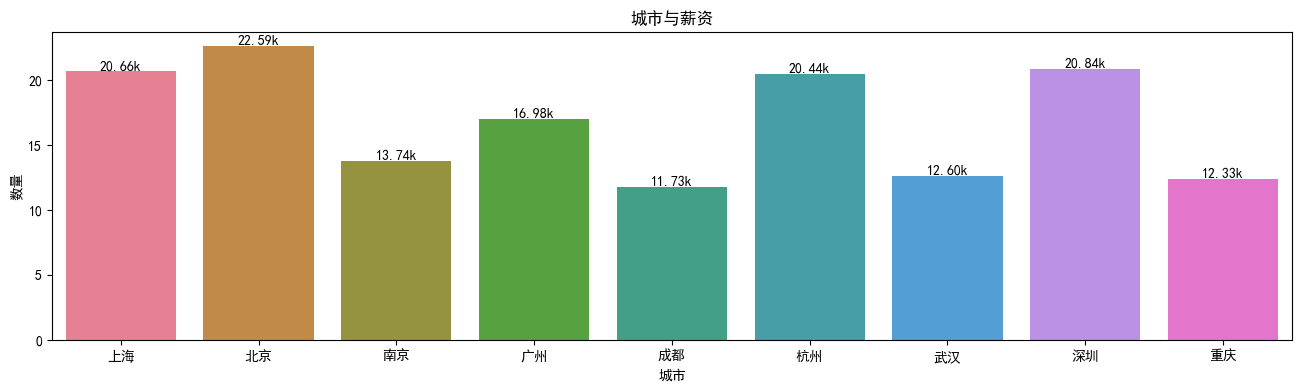

In [14]:
#制图,用barplot方便横向对比
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(salByCity))
_ = sns.barplot(data = salByCity, x="city",y = "mean_salary", hue="city",palette=cls)
_.set_title("城市与薪资")
# 在每个柱上标出数值
for i in range(len(salByCity)):
    plt.text(i, salByCity.mean_salary[i], f'{salByCity.mean_salary[i]:.2f}k', ha='center', va='bottom')
#坐标轴
plt.xlabel("城市")
plt.ylabel("数量")


In [15]:
salByCity.sort_values(by="mean_salary",ascending=False)

,city,mean_salary
1,北京,22.591111
7,深圳,20.841191
0,上海,20.657143
5,杭州,20.442308
3,广州,16.976190
2,南京,13.744286
6,武汉,12.600000
8,重庆,12.333333
4,成都,11.730769


北京平均薪资最高，达到22.59K，其次是深圳、上海、杭州

成都平均薪资最低，为11.73k

## 1.3 N薪分布

In [16]:
# N薪指每年拿多少薪
Nsalary = pdata.salaryMonth
Nsalary.unique()

array([14,  0, 13, 15, 16, 17, 18, 20, 24], dtype=int64)

In [17]:
#查找是否有缺省值
Nsalary.isnull().sum()

0

无缺省值，不用处理

In [18]:
#其中0薪指的是12薪，将其替换至12薪
Nsalary = pd.DataFrame(Nsalary.replace(0,12),columns = ["salaryMonth"])
Nsalary

,salaryMonth
0,14
1,12
2,12
3,14
4,12
...,...
3175,13
3176,12
3177,12
3178,12


Text(0, 0.5, '数量')

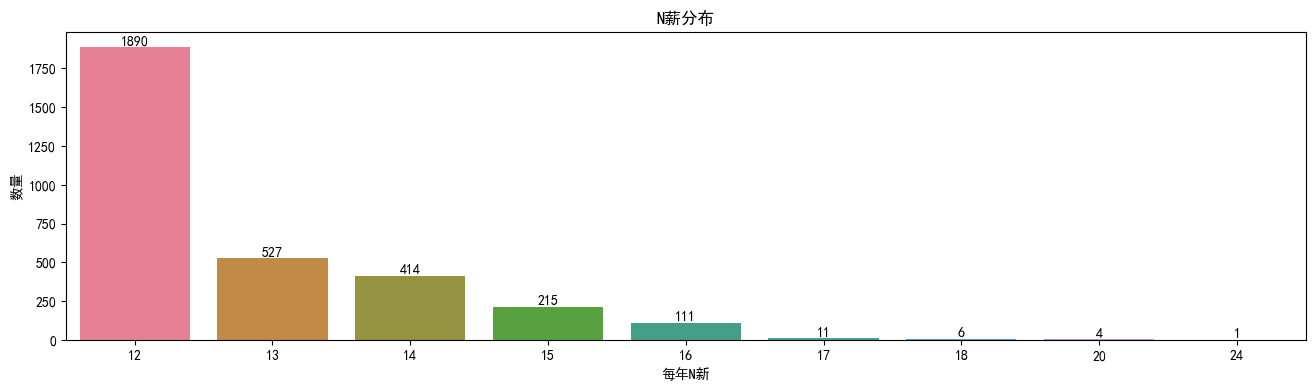

In [19]:
#制图
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(Nsalary['salaryMonth'].unique()))
ax = sns.countplot(data = Nsalary, x="salaryMonth", hue="salaryMonth",palette=cls,legend=False)
ax.set_title("N薪分布")
# 在每个柱上标出数值
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
#坐标轴
plt.xlabel("每年N新")
plt.ylabel("数量")

12薪人数最多，之后逐次减小

## 1.4 工作年限与薪资

In [20]:
#工作年限的格式
pdata["workYear"].unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [21]:
#获取每个工作年限段对应的平均工资(单位为k)
salByWorkYear = pdata.groupby("workYear")["mean_salary"].apply(lambda x: x.map(lambda y: int(y)).mean());
salByWorkYear = pd.DataFrame(salByWorkYear)
#将工资年限手动排序
workYearOrder = ["在校/应届","1年以下","1-3年","3-5年","5-10年","10年以上","不限"]
salByWorkYear = salByWorkYear.sort_values(by='workYear', key=lambda x: x.map({v: i for i, v in enumerate(workYearOrder)}))
salByWorkYear

,mean_salary
workYear,
在校/应届,7.252000
1年以下,8.039216
1-3年,12.580178
3-5年,20.406446
5-10年,27.466993
10年以上,44.200000
不限,14.551802


Text(0, 0.5, '平均薪资')

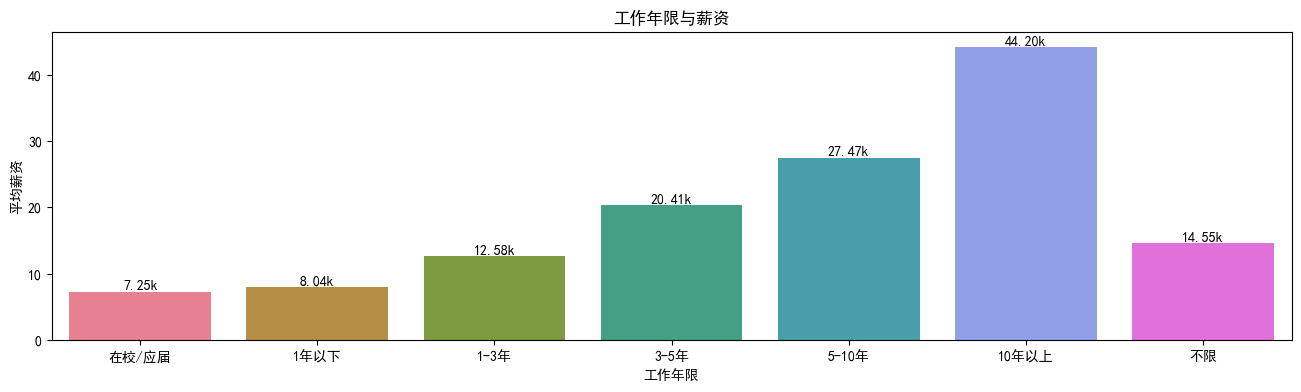

In [22]:
#制图
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(salByWorkYear))
_ = sns.barplot(data = salByWorkYear, x="workYear",y = "mean_salary", hue="workYear",palette=cls)
_.set_title("工作年限与薪资")
# 在每个柱上标出数值
for i in range(len(salByWorkYear)):
    plt.text(i, salByWorkYear.mean_salary.iloc[i], f'{salByWorkYear.mean_salary.iloc[i]:.2f}k', ha='center', va='bottom')
#坐标轴
plt.xlabel("工作年限")
plt.ylabel("平均薪资")

由图可知，工作年限越久，薪资越高

# 2 职位分析
## 2.1 不同城市职位数量

In [23]:
# 查找缺省值
pdata.positionName.isnull().sum()

0

In [24]:
# 根据城市分组，获取各个城市所拥有的职位名称
jobsByCity = pdata.groupby("city")["positionName"].unique()
jobsByCity

city
上海    [数据分析师, 高级数据分析师, 数据分析实习生, 资深数据分析师, 薪酬数据分析专员, 数...
北京    [资深数据分析师, 数据分析实习生, 数据分析师, 数据分析工程师, 游戏数据分析师, 高级...
南京    [数据分析师, 数据分析产品研发负责人-To B, 资深数据分析师, 商品数据分析师 (MJ...
广州    [数据分析师, 高级数据分析师, 资深数据分析师, 数据分析专员, 数据分析, 数据分析实习...
成都    [数据分析师, 资深数据分析师, 数据分析专家, 数据分析专员, 高级数据分析师, 数据分析...
杭州    [高级数据分析师, 电商数据分析师, (高级)数据分析师专家, 数据分析实习生, 数据分析师...
武汉    [数据分析师, 高级数据分析师(大力教育), 数据分析专家, 高级数据分析师, 数据分析工程...
深圳    [资深数据分析师, 数据分析师, 社交媒体数据分析, 022440-数据分析岗, 02420...
重庆    [数据分析师, 数据分析（运营支持）, 数据分析主管, 高级数据分析师, 数据分析专员, 大...
Name: positionName, dtype: object

In [25]:
# 计算每个城市的职位数量
job_count_by_city = jobsByCity.apply(len)
job_count_by_city = pd.DataFrame({'City': job_count_by_city.index, 'Job_Count': job_count_by_city.values})
job_count_by_city

,City,Job_Count
0,上海,202
1,北京,188
2,南京,271
3,广州,111
4,成都,60
5,杭州,83
6,武汉,345
7,深圳,228
8,重庆,196


Text(0, 0.5, '职位种类数量')

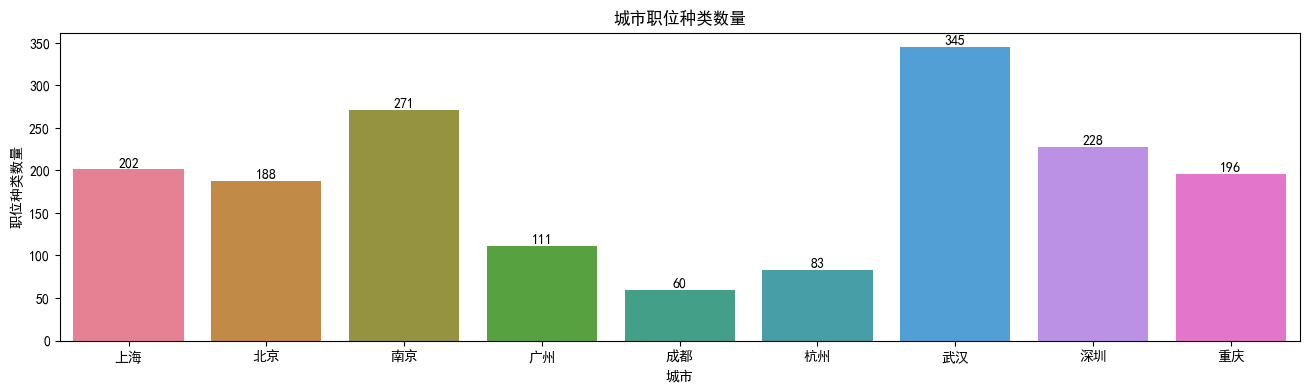

In [26]:
# 制图
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(job_count_by_city))
_ = sns.barplot(data = job_count_by_city, x="City",y = "Job_Count", hue="City",palette=cls)
_.set_title("城市职位种类数量")
# 在每个柱上标出数值
for i in range(len(job_count_by_city)):
    plt.text(i, job_count_by_city.Job_Count[i], job_count_by_city.Job_Count[i], ha='center', va='bottom')
#坐标轴
plt.xlabel("城市")
plt.ylabel("职位种类数量")

武汉职位种类最多，达到345种

成都职位种类最少，只有60种

## 2.2 公司融资情况

In [27]:
# 查找缺省值
pdata.financeStage.isnull().sum()

0

In [28]:
#查看融资情况的数据格式
pdata.financeStage.unique()

array(['D轮及以上', '不需要融资', 'A轮', '上市公司', 'B轮', 'C轮', '未融资', '天使轮'],
      dtype=object)

In [29]:
# 都有哪些公司
pdata.companyShortName.unique()

array(['拉勾网', '字节跳动', '欧科云链集团', ..., '博昆软件', '中国平安股份有限公司', '倍丝露电子商务'],
      dtype=object)

In [30]:
#根据融资情况分组，获取所有公司的名字
compByFin = pdata.groupby("financeStage").companyShortName.unique()
compByFin

financeStage
A轮       [京东物流, 中电博亚, 拉克沙LAKSA, 音悦荚, 赛目科技, 悦福享, 集侦云, Da...
B轮       [鲸鱼外教培优, 易观, 小帮规划, 哗啦啦, 石墨文档, 斗米, 转转, 数数科技, 欢忻...
C轮       [乐约健康, 省钱快报, 果壳, 柏睿数据, 豌豆思维, 轻松集团, 资产360, 掌上先机...
D轮及以上    [拉勾网, 字节跳动, 小叶子The ONE, 爱回收, 每日优鲜, 闪送, 唱吧-玩音乐，...
上市公司     [小米集团, 360数科, 老虎集团, 贝壳, 掌阅, 紫光教育, 当当网, 赤子城, ca...
不需要融资    [欧科云链集团, 民生科技, 边锋, 琥珀创想, 泰康保险集团, Riley Cillian...
天使轮      [YoungGee, 众泽睿诚, 想出网络科技, 格蓝威驰科技, 上海荟力, 华信集团, 企...
未融资      [微淼财商, 地坪线, Dilato, 硅基远航, 国美金控, 融易推, 越博华阳商务服务,...
Name: companyShortName, dtype: object

In [31]:
# 计算每种融资情况的公司数量
compByFin_num = compByFin.apply(len)
compByFin_num = pd.DataFrame({'Fin': compByFin_num.index, 'Count': compByFin_num.values})
compByFin_num

,Fin,Count
0,A轮,133
1,B轮,129
2,C轮,74
3,D轮及以上,78
4,上市公司,264
5,不需要融资,432
6,天使轮,51
7,未融资,312


Text(0, 0.5, '公司数量')

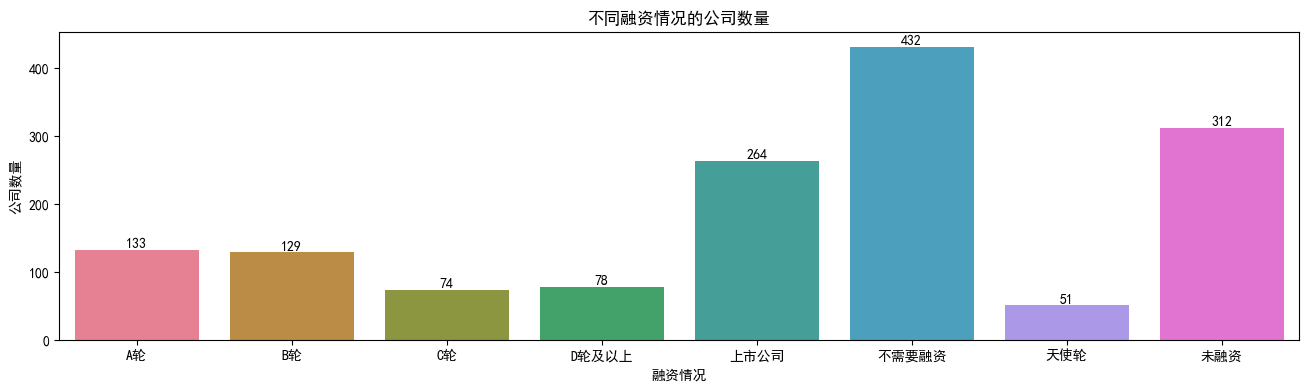

In [32]:
# 制图
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(compByFin_num))
_ = sns.barplot(data = compByFin_num, x="Fin",y = "Count", hue="Fin",palette=cls)
_.set_title("不同融资情况的公司数量")
# 在每个柱上标出数值
for i in range(len(compByFin_num)):
    plt.text(i, compByFin_num.Count[i], compByFin_num.Count[i], ha='center', va='bottom')
#坐标轴
plt.xlabel("融资情况")
plt.ylabel("公司数量")

不需要融资和未融资的公司数量最多，天使轮最少

## 2.3 不同行业公司数量

In [33]:
# 查找缺省值
pdata.industryField.isnull().sum()

4

In [34]:
# 打印缺省条目
pdata[pdata.industryField.isnull()]

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage,mean_salary
462,8593827,薪酬数据分析专员,尚励信息技术（上海）有限公司,尚励信息技术（上海）有限公司,50-150人,不需要融资,NaN,[],公务员|其他,['软件服务｜咨询'],...,上海,浦东新区,NaN,6k-8k,0,不限,全职,本科,工资氛围好稳定,7.0
1476,7934675,数据仓库开发工程师,南京金鹰国际集团有限公司,金鹰国际,150-500人,不需要融资,NaN,[],开发|测试|运维类,"['大数据', '新零售', 'Hadoop', '数据仓库', 'Hive', 'ETL']",...,南京,建邺区,['应天西路'],15k-25k,0,3-5年,全职,本科,五险一金，转正后享受内购和健身福利,20.0
1914,8680456,运营专员,武汉善锦程商务咨询服务有限公司,善锦程,少于15人,不需要融资,NaN,[],运营|编辑|客服类,"['软件服务｜咨询', '数据服务｜咨询', '运营', '用户增长']",...,武汉,汉阳区,['王家湾'],4k-7k,0,1-3年,全职,大专,工作氛围轻松，天天下午茶,5.5
2472,7934675,数据仓库开发工程师,南京金鹰国际集团有限公司,金鹰国际,150-500人,不需要融资,NaN,[],开发|测试|运维类,"['大数据', '新零售', 'Hadoop', '数据仓库', 'Hive', 'ETL']",...,南京,建邺区,['应天西路'],15k-25k,0,3-5年,全职,本科,五险一金，转正后享受内购和健身福利,20.0


In [35]:
# 省略缺省条目
Ind_Field = pdata.dropna(subset=["industryField"])

In [36]:
Ind_Field.industryField.unique()

array(['企业服务', '内容资讯,短视频', '区块链', '工具类产品,在线教育', '金融业,科技金融', '物流｜运输', '游戏',
       '工具类产品', '在线教育', '智能硬件,电商平台', '科技金融', '电商平台', '居住服务',
       '内容社区,音频｜视频媒体', '人工智能服务', '物流平台', '内容社区', '金融业', '社交媒体', '旅游｜出行',
       '数据服务｜咨询', '移动互联网,游戏', '移动互联网,企业服务', '移动互联网,社交', '软件服务｜咨询', '社交平台',
       '营销服务｜咨询', '教育、数据服务', '新零售,电商平台', '专业服务｜咨询', '生活服务', '移动互联网,电商',
       'IT技术服务｜咨询', '影视｜动漫', '教育｜培训', '短视频', '内容资讯,社交媒体', '软件服务｜咨询,在线医疗',
       '内容资讯,游戏,音频｜视频媒体', '短视频,新零售', '金融', '音频｜视频媒体', '制造业', 'MCN｜直播平台',
       '其他', '分类信息,消费生活', '软件服务｜咨询,数据服务｜咨询,人工智能服务', '数据服务｜咨询,营销服务｜咨询',
       '工具类产品,软件服务｜咨询', '汽车交易平台', '物联网', '硬件,软件开发', '硬件,电商', '内容资讯',
       '数据服务｜咨询,营销服务｜咨询,IT技术服务｜咨询', '教育', '通讯电子', '旅游｜出行,生活服务',
       '移动互联网,其他', 'IT技术服务｜咨询,智能硬件,能源｜矿产｜环保', '旅游', '医疗丨健康,企业服务',
       'IT技术服务｜咨询,软件服务｜咨询,数据服务｜咨询', '移动互联网,数据服务', '工具类产品,信息检索,信息安全',
       '企业服务,广告营销', '移动互联网,消费生活', '消费生活', '电商', '软件服务｜咨询,IT技术服务｜咨询',
       '房地产｜建筑｜物业', '数据服务｜咨询,人工智能服务', '软件服务｜咨询,智能硬件', '汽车丨出行',
       '人工智能服务,智能硬件', 'IT技

In [37]:
#提取需要的两列(公司，行业)
Ind_Field = Ind_Field[["companyShortName","industryField"]]
Ind_Field

,companyShortName,industryField
0,拉勾网,企业服务
1,字节跳动,"内容资讯,短视频"
2,欧科云链集团,区块链
3,欧科云链集团,区块链
4,拉勾网,"工具类产品,在线教育"
...,...,...
3175,腾讯,"游戏,社交媒体,音频｜视频媒体"
3176,药智网,数据服务｜咨询
3177,药智网,数据服务｜咨询
3178,重庆道微投资,金融


In [38]:
#用str.split方法分割行业
company = Ind_Field.companyShortName
Ind_Field = Ind_Field.industryField.str.split(r"[,｜丨、\s]",expand=True)
Ind_Field["company"] = company
Ind_Field

,0,1,2,3,4,5,company
0,企业服务,None,None,None,None,None,拉勾网
1,内容资讯,短视频,None,None,None,None,字节跳动
2,区块链,None,None,None,None,None,欧科云链集团
3,区块链,None,None,None,None,None,欧科云链集团
4,工具类产品,在线教育,None,None,None,None,拉勾网
...,...,...,...,...,...,...,...
3175,游戏,社交媒体,音频,视频媒体,None,None,腾讯
3176,数据服务,咨询,None,None,None,None,药智网
3177,数据服务,咨询,None,None,None,None,药智网
3178,金融,None,None,None,None,None,重庆道微投资


In [39]:
#设置公司为index来将其排除stack的作用范围，用stack将所有行业转换成一列，用droplevel舍弃无用的默认索引，用reset_index将公司名改回列以方便制表
Ind_Field = Ind_Field.set_index("company").stack().droplevel(1).reset_index().rename({0:"Field"},axis = 1);
Ind_Field

,company,Field
0,拉勾网,企业服务
1,字节跳动,内容资讯
2,字节跳动,短视频
3,欧科云链集团,区块链
4,欧科云链集团,区块链
...,...,...
5876,药智网,咨询
5877,药智网,数据服务
5878,药智网,咨询
5879,重庆道微投资,金融


In [40]:
# 根据行业领域数量排序
# 统计行业数量
Ind_Field = Ind_Field['Field'].value_counts().reset_index()
Ind_Field.columns = ['Field','count']
Ind_Field

,Field,count
0,咨询,762
1,数据服务,361
2,电商平台,269
3,移动互联网,232
4,游戏,227
...,...,...
79,娱乐,4
80,不限,3
81,工具,1
82,电子商务,1


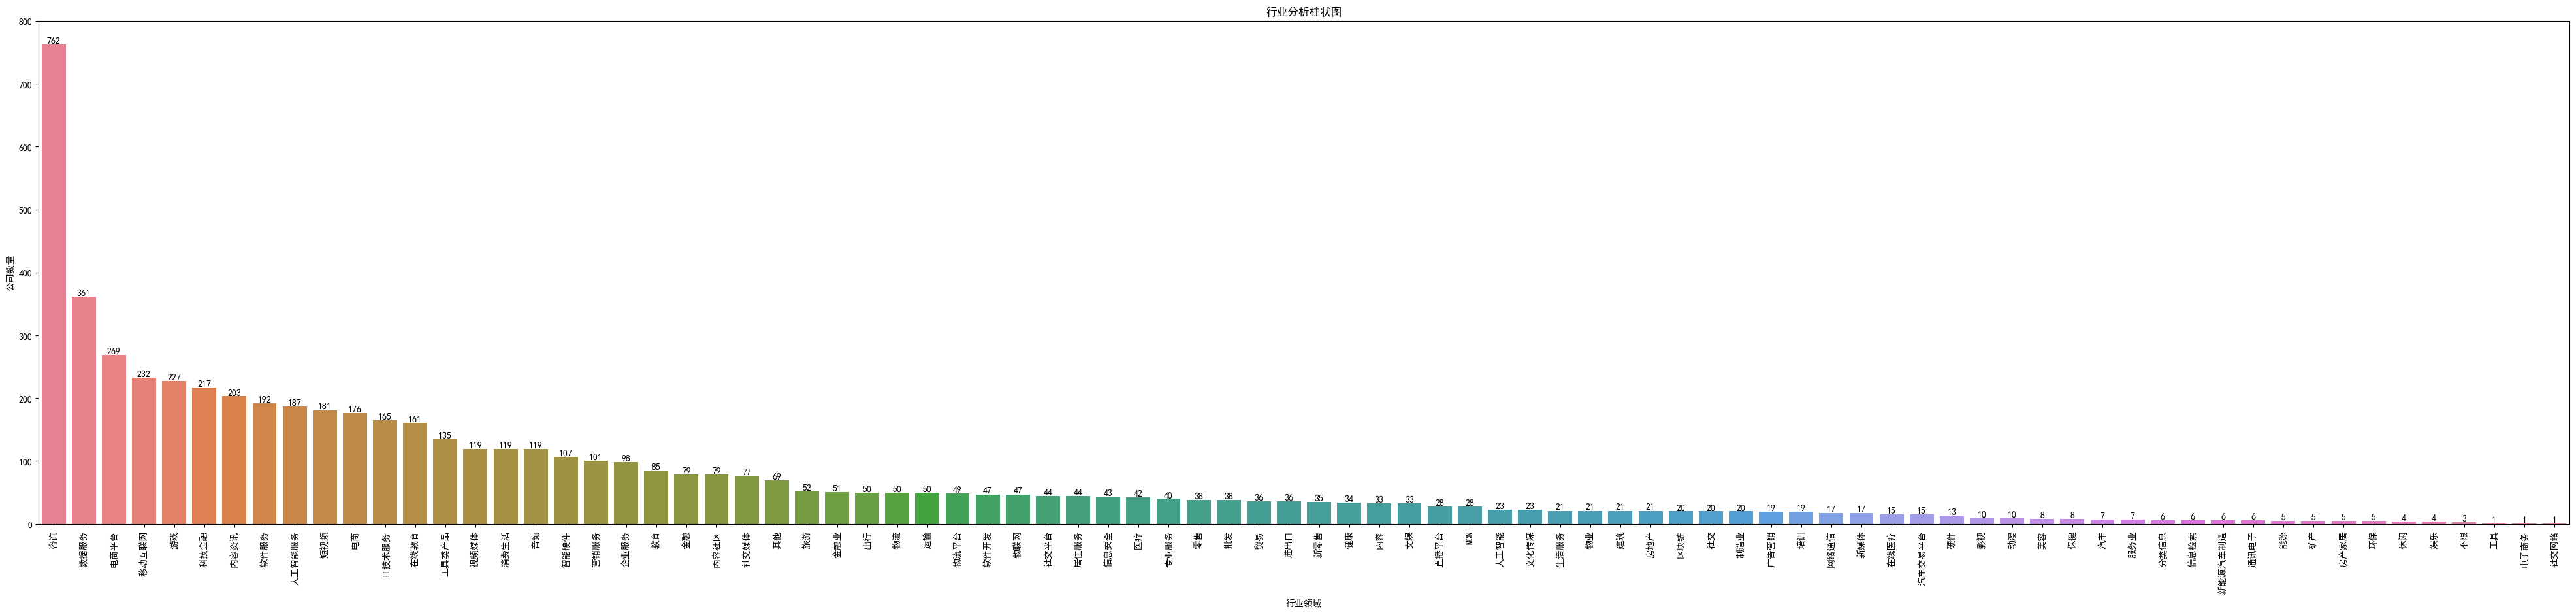

In [41]:
#绘制柱状图
#设置画布大小
plt.figure(figsize = (50,10));
#设置标题
#绘图
cls = sns.color_palette(palette='husl', n_colors=len(Ind_Field))
_ = sns.barplot(data = Ind_Field, x="Field",y = "count", hue="Field",palette=cls)
_.set_title("行业分析柱状图")
# 在每个柱上标出数值
for i in range(len(Ind_Field)):
    plt.text(i, Ind_Field['count'][i], Ind_Field['count'][i], ha='center', va='bottom')
#坐标轴
plt.xlabel("行业领域")
plt.ylabel("公司数量")
# 横坐标旋转
ax = plt.xticks(rotation=90)

由图可知，咨询类公司最多，有762个，数据服务其次

最少的有社交网络、电子商务与工具类，只有一个

## 2.4 工作经验分析

In [42]:
# 查找缺省值
pdata.workYear.isnull().sum()

0

In [43]:
#工作经验主要可以参考工作年限
workYears = pdata.workYear
workYears = pd.Series(workYears).value_counts().reset_index()
workYears.columns = ['Year','count']
workYears

,Year,count
0,3-5年,1117
1,1-3年,898
2,不限,444
3,5-10年,409
4,在校/应届,250
5,1年以下,51
6,10年以上,10


Text(0, 0.5, '员工数量')

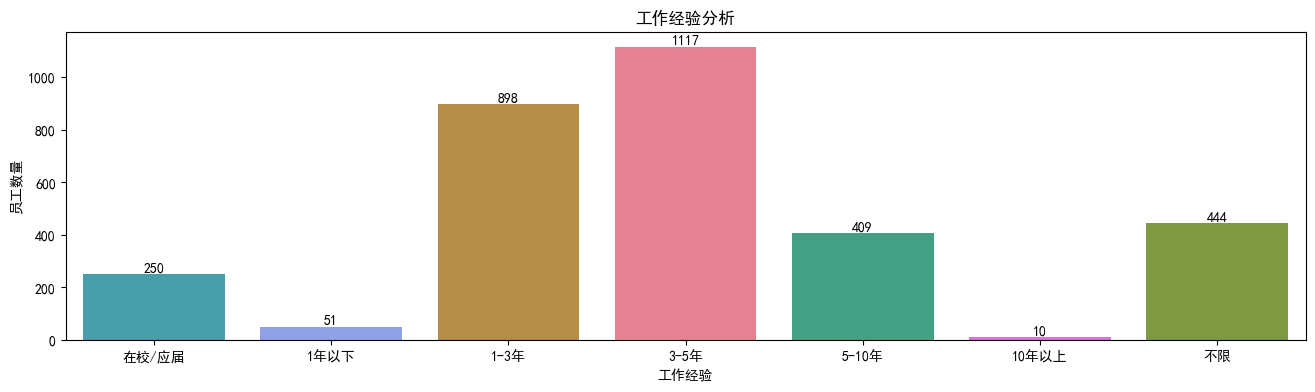

In [48]:
# 制图
plt.figure(figsize = (16,4))
cls = sns.color_palette(palette='husl', n_colors=len(workYears))
workYearOrder = ["在校/应届","1年以下","1-3年","3-5年","5-10年","10年以上","不限"]
_ = sns.barplot(data = workYears, x="Year",y = "count", hue="Year",palette=cls,order=workYearOrder)
_.set_title("工作经验分析")
# 在每个柱上标出数值
for i in range(len(workYearOrder)):
    plt.text(i, int(workYears[workYears['Year']==workYearOrder[i]]['count'].iloc[0]), int(workYears[workYears['Year']==workYearOrder[i]]['count'].iloc[0]), ha='center', va='bottom')
#坐标轴
plt.xlabel("工作经验")
plt.ylabel("员工数量")

## 2.5 词云分析

In [45]:
lables = pd.DataFrame(pdata.positionLables);
#把字符串['xxx','xxx']变为xxx,xxx以方便之后拆分各个标签
def normaliseStr(s):
    res = "";
    for c in s:
        if c.isalnum() or c == ",":
            res += c;
    return res;
    
lables.positionLables = lables.positionLables.map(normaliseStr);
lables

,positionLables
0,数据分析
1,后端开发
2,数据分析
3,"商业,SQL,数据分析"
4,"数据分析,hive,SQL"
...,...
3175,"体系,指标,项目管理,过程管理,数据分析,指标管理"
3176,产品策划
3177,数据服务咨询
3178,"科技金融,金融业,软件开发"


In [46]:
#拆分标签，然后用stack合为1列
lables = pd.DataFrame(lables["positionLables"].str.split(r",",expand=True).stack().droplevel(1))
lables.columns=['lable']
lables

,lable
0,数据分析
1,后端开发
2,数据分析
3,商业
3,SQL
...,...
3178,科技金融
3178,金融业
3178,软件开发
3179,证券期货


(-0.5, 1999.5, 999.5, -0.5)

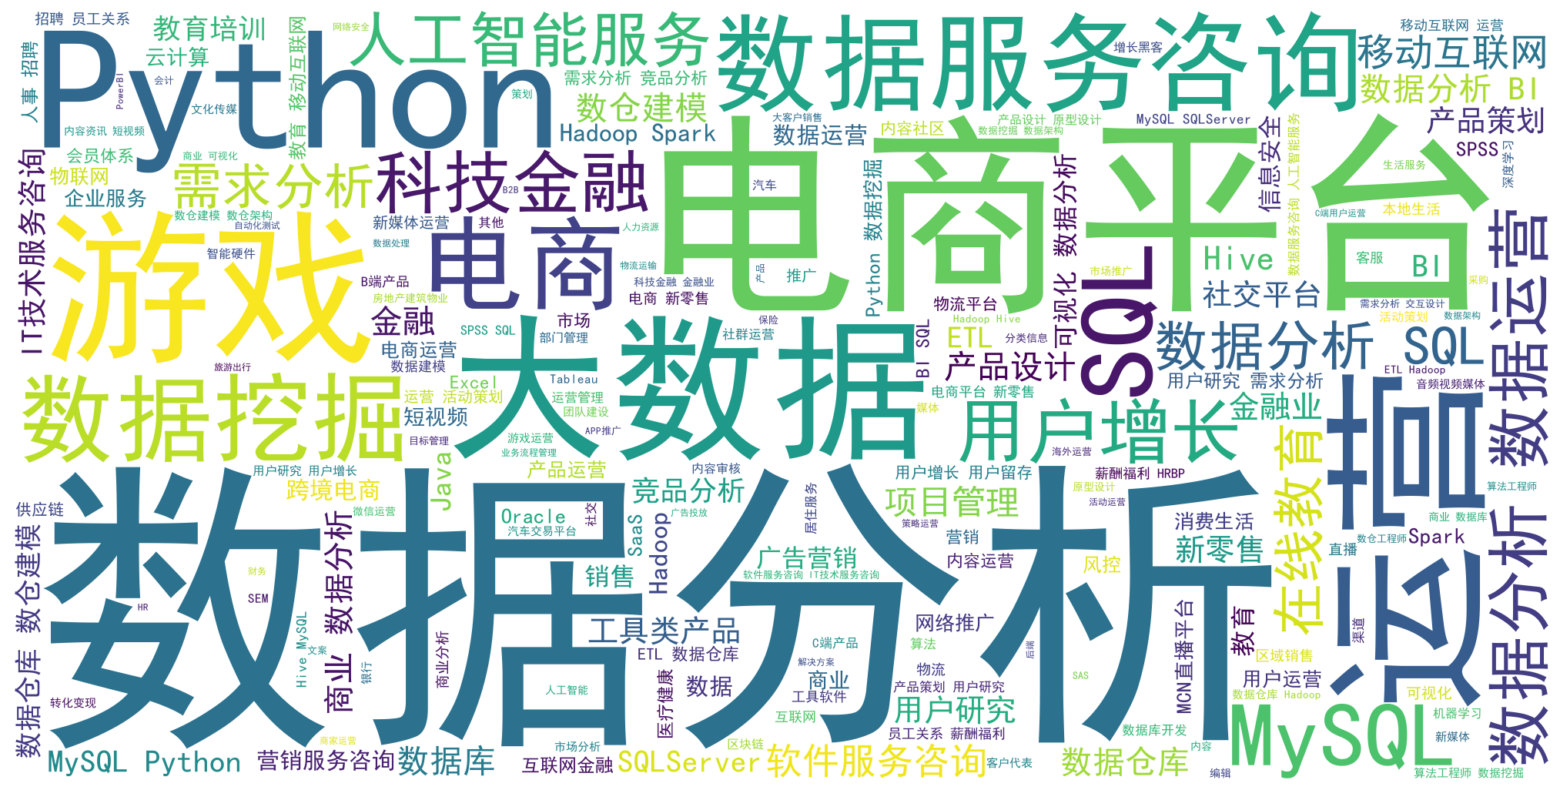

In [47]:
from wordcloud import WordCloud
import random

# 将文本数据合并为一个字符串
text = ' '.join(lables['lable'])

# 创建 WordCloud 对象
font_path = "C:\Windows\Fonts\simhei.ttf"  # 替换为中文字体文件的路径
wordcloud = WordCloud(width=2000, height=1000, background_color='white', font_path=font_path).generate(text)

# 绘制词云图
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')